# Proyecto 1

Alan Badillo Salas (badillo.soft@hotmail.com)

In [49]:
import random

edades = [random.randint(0, 99) for i in range(100)] # [23, 64, 19, 38, 24, 55, 72, 93, 8]
generos = [random.choice(["h", "m"]) for i in range(100)]

In [50]:
import pandas as pd

df = pd.DataFrame({ "edad": edades, "genero": generos })

df.head()

,edad,genero
0,46,h
1,20,h
2,62,h
3,70,h
4,20,m


Podemos partir las edades en grupos de 4 o 5 grupos para edades de 0 a 100, es decir, si dividimos enteramente la edad sobre 4 nos genera 4 / 100 nos genera 4 grupos en edades de 0 a 100.

In [51]:
min_edad = 0 # min(df["edad"])
max_edad = 100 # max(df["edad"])

df["edad_cat"] = (10 * (df["edad"] - min_edad) / (max_edad - min_edad))
df["edad_cat"] = df["edad_cat"].map(int)

df.head()

,edad,genero,edad_cat
0,46,h,4
1,20,h,2
2,62,h,6
3,70,h,7
4,20,m,2


In [52]:
df["genero_cat"] = df["genero"].map({ "h": 1, "m": 2 })

df.head()

,edad,genero,edad_cat,genero_cat
0,46,h,4,1
1,20,h,2,1
2,62,h,6,1
3,70,h,7,1
4,20,m,2,2


In [53]:
c1 = list(set(df["edad_cat"]))

c1

[0L, 1L, 2L, 3L, 4L, 5L, 6L, 7L, 8L, 9L]

In [54]:
c2 = list(set(df["genero_cat"]))

c2

[1L, 2L]

In [55]:
import numpy as np

mat = np.zeros((len(c2), len(c1)))

mat

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [56]:
for i in range(len(c2)):
    for j in range(len(c1)):
        a = c1[j] # "a" toma el valor de cada categoría en C1
        b = c2[i] # "b" toma el valor de cada categoría en C2
        n = len(df.query("edad_cat=={} and genero_cat=={}".format(a, b)))
        mat[i][j] = n
        
mat     

array([[ 7.,  2.,  5.,  4.,  6.,  3.,  5.,  8.,  6.,  2.],
       [ 7.,  4., 11.,  5.,  1.,  6.,  5.,  4.,  4.,  5.]])

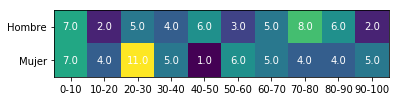

In [57]:
import matplotlib.pyplot as plt

labels_edad = ["{}-{}".format(edad * 10, edad * 10 + 10) for edad in c1]
labels_genero = ["Hombre", "Mujer"]

fig, ax = plt.subplots()
im = ax.imshow(mat)

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels_edad)))
ax.set_yticks(np.arange(len(labels_genero)))
# ... and label them with the respective list entries
ax.set_xticklabels(labels_edad)
ax.set_yticklabels(labels_genero)

for i in range(len(labels_genero)):
    for j in range(len(labels_edad)):
        text = ax.text(j, i, mat[i, j],
                       ha="center", va="center", color="w")

plt.show()

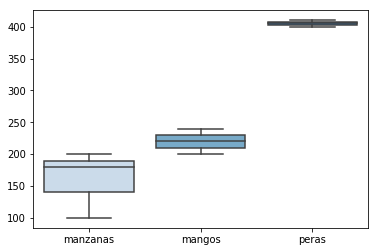

In [62]:
import seaborn as sns

cat = pd.Series(["manzanas", "manzanas", "manzanas", "mangos", "mangos", "mangos", "peras", "peras", "peras", "peras"])
esc = [100, 200, 180, 200, 220, 240, 400, 410, 405]

sns.boxplot( x=cat, y=esc, palette="Blues")